In [1]:
!pip install gensim

!pip install nltk

In [2]:
# import key libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
stock_df = pd.read_csv('stock_sentiment.csv')
stock_df.head(10)

,Text,Sentiment
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1
2,user I'd be afraid to short AMZN - they are lo...,1
3,MNTA Over 12.00,1
4,OI Over 21.37,1
5,PGNX Over 3.04,1
6,AAP - user if so then the current downtrend wi...,0
7,Monday's relative weakness. NYX WIN TIE TAP IC...,0
8,GOOG - ower trend line channel test & volume s...,1
9,AAP will watch tomorrow for ONG entry.,1


In [4]:
stock_df.isnull().sum()

Text         0
Sentiment    0
dtype: int64

In [5]:
stock_df.nunique()

Text         5791
Sentiment       2
dtype: int64

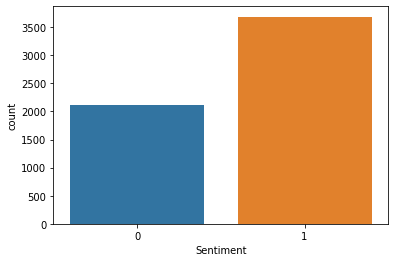

In [6]:
sns.countplot(x = stock_df['Sentiment'])

In [7]:
import string


In [8]:
def remove_punc(text):
  return ''.join([char for char in text if char not in string.punctuation])

In [9]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [10]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'will', 'aap', 'co','day','user', 'stock','today'])

In [11]:
import gensim

# remove stopwords and remove short words (less than 2 characters)
def preprocess(text):
  result = []
  for token in gensim.utils.simple_preprocess(text):
    if len(token) >= 3 and token not in stop_words:
      result.append(token)

  return result

In [12]:
stock_df['Cleaned Text'] = stock_df['Text'].apply(remove_punc)
stock_df['Cleaned Text'] = stock_df['Cleaned Text'].apply(preprocess)

In [13]:
stock_df.head()

,Text,Sentiment,Cleaned Text
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,"[kickers, watchlist, xide, tit, soq, pnk, cpw,..."
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,"[movie, return, feageed, indicator, trades, ye..."
2,user I'd be afraid to short AMZN - they are lo...,1,"[afraid, short, amzn, looking, like, nearmonop..."
3,MNTA Over 12.00,1,[mnta]
4,OI Over 21.37,1,[]


In [14]:
# retrieve all the tokens from the dataframe in a list
list_of_words = []
for i in stock_df['Cleaned Text']:
  for j in i:
    list_of_words.append(j)

# get total number of unique words
total_words = len(list(set(list_of_words)))

In [15]:
X = stock_df['Cleaned Text']
y = stock_df['Sentiment']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

print(X_train.shape)
print(X_train)

(4632,)
5051    [global, oil, demand, expected, fall, record, ...
5173    [pay, plastic, merchants, pay, banks, soon, sm...
46      [new, post, bac, month, highs, showing, signs,...
829                                   [cndo, ooking, one]
727                             [lets, see, say, goodbye]
                              ...                        
194                    [looks, good, heading, next, week]
5222    [global, markets, extended, gains, amid, early...
157     [jcp, keep, eye, triangle, big, short, int, re...
1490                    [block, makes, bets, move, april]
4760    [eps, made, quick, min, trade, looks, like, mi...
Name: Cleaned Text, Length: 4632, dtype: object


In [16]:
from tensorflow.keras.preprocessing.text import Tokenizer

# create a tokenizer to tokenize the words and create sequences of tokenized words

tokenizer = Tokenizer(num_words= total_words)
tokenizer.fit_on_texts(X_train)

train_sequences = tokenizer.texts_to_sequences(X_train) # <-- tokenized version of the train data
test_sequences = tokenizer.texts_to_sequences(X_test)

In [17]:
train_sequences

[[98, 95, 296, 392, 226, 342, 84, 1711, 78, 3343, 3344, 3345, 3346],
 [174, 2256, 2257, 174, 207, 120, 155, 527, 31, 174, 3347, 3348],
 [7, 159, 9, 227, 40, 439, 778, 2258],
 [3349, 265, 20],
 [440, 23, 187, 1712],
 [414, 626, 627, 574, 415],
 [115, 62, 96, 1402, 1713, 2259, 470, 5, 21, 3350],
 [188, 7, 40],
 [74, 3351, 3352, 885, 1169],
 [22, 41, 28, 1403, 41, 30, 490, 779, 1404, 1170, 3353, 1714, 886],
 [2260, 64, 12, 887, 2261, 286],
 [416, 628, 3354, 3355, 1715, 528, 3356, 53, 189, 190, 416],
 [36, 3, 32, 227, 68, 55],
 [629, 3357, 1716, 215, 703, 3358, 177, 704, 167, 3359],
 [1405, 703, 98, 47, 780, 888, 1717, 3360, 3361],
 [3362, 471, 1406, 184, 1407, 29, 85, 18, 42, 160, 1718, 1719],
 [266, 66, 133, 123, 630, 889, 133, 105, 705, 69, 86, 1009],
 [102, 441, 442, 178, 6],
 [7, 43, 1408, 2262, 2263, 12, 890, 343],
 [145, 256, 256, 256, 145, 706, 111, 706, 111, 706, 111],
 [297, 1010, 191, 1, 363, 14, 529, 891, 393],
 [1171,
  1172,
  87,
  1409,
  1173,
  892,
  23,
  707,
  1720,
 

In [18]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# add padding 
padded_train = pad_sequences(train_sequences, maxlen = 15, padding='post', truncating='post')
padded_test = pad_sequences(test_sequences, maxlen = 15, padding='post')

In [19]:
for i, doc in enumerate(padded_train[:3]):
  print('The padded encoding for document:', i+1, 'is: ', doc)

The padded encoding for document: 1 is:  [  98   95  296  392  226  342   84 1711   78 3343 3344 3345 3346    0
    0]
The padded encoding for document: 2 is:  [ 174 2256 2257  174  207  120  155  527   31  174 3347 3348    0    0
    0]
The padded encoding for document: 3 is:  [   7  159    9  227   40  439  778 2258    0    0    0    0    0    0
    0]


In [20]:
from tensorflow.keras.utils import to_categorical

# convert the data to categorical 2d representation

y_train_cat = to_categorical(y_train, 2)
y_test_cat = to_categorical(y_test, 2)

In [21]:
y_train_cat

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [22]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional, Dropout
from tensorflow.keras.models import Model

In [23]:
model = Sequential()

model.add(Embedding(total_words, output_dim=512))
model.add(LSTM(256))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(2, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 512)         4746240   
_________________________________________________________________
lstm (LSTM)                  (None, 256)               787456    
_________________________________________________________________
dense (Dense)                (None, 128)               32896     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 258       
Total params: 5,566,850
Trainable params: 5,566,850
Non-trainable params: 0
_________________________________________________________________


In [33]:
history = model.fit(padded_train, y_train_cat, batch_size=32, validation_split=0.3, epochs=2)

Epoch 1/2
102/102 [==============================] - 17s 166ms/step - loss: 0.0283 - acc: 0.9907 - val_loss: 1.2922 - val_acc: 0.7410
Epoch 2/2
102/102 [==============================] - 17s 167ms/step - loss: 0.0160 - acc: 0.9948 - val_loss: 1.4218 - val_acc: 0.7367
